In [3]:
inFile = ROOT . TFile . Open ( "new_urqmd_efficiency_pt_y_yield_bdt_cut_0.9.root" ," READ ")
inFile1 = ROOT . TFile . Open ( "new_dcm_100_efficiency_pt_y_yield_bdt_cut_0.9.root" ," READ ")
inFile.ls()

TFile**		new_urqmd_efficiency_pt_y_yield_bdt_cut_0.9.root	
 TFile*		new_urqmd_efficiency_pt_y_yield_bdt_cut_0.9.root	
  KEY: TTree	t1;1	tree
  KEY: TH2F	recons_urqmd;1	
  KEY: TH2F	Mc_urqmd;1	Mc_urqmd
  KEY: TH2F	Mc in reconstructed_urqmd;1	Mc in reconstructed_urqmd
  KEY: TH2F	urqmd_Efficiency;1	Efficiency


TFile**		new_urqmd_efficiency_pt_y_yield_bdt_cut_0.9.root	
 TFile*		new_urqmd_efficiency_pt_y_yield_bdt_cut_0.9.root	
  KEY: TTree	t1;1	tree
  KEY: TH2F	recons_urqmd;1	
  KEY: TH2F	Mc_urqmd;1	Mc_urqmd
  KEY: TH2F	Mc in reconstructed_urqmd;1	Mc in reconstructed_urqmd
  KEY: TH2F	urqmd_Efficiency;1	Efficiency


Warning in <TCanvas::Constructor>: Deleting canvas with same name:  canvas 
Info in <TCanvas::Print>: png file /home/shahid/cbmsoft/Cut_optimization/uncut_data/Project/pT_rapidity_distribution_XGB_extracted_signal.png has been created


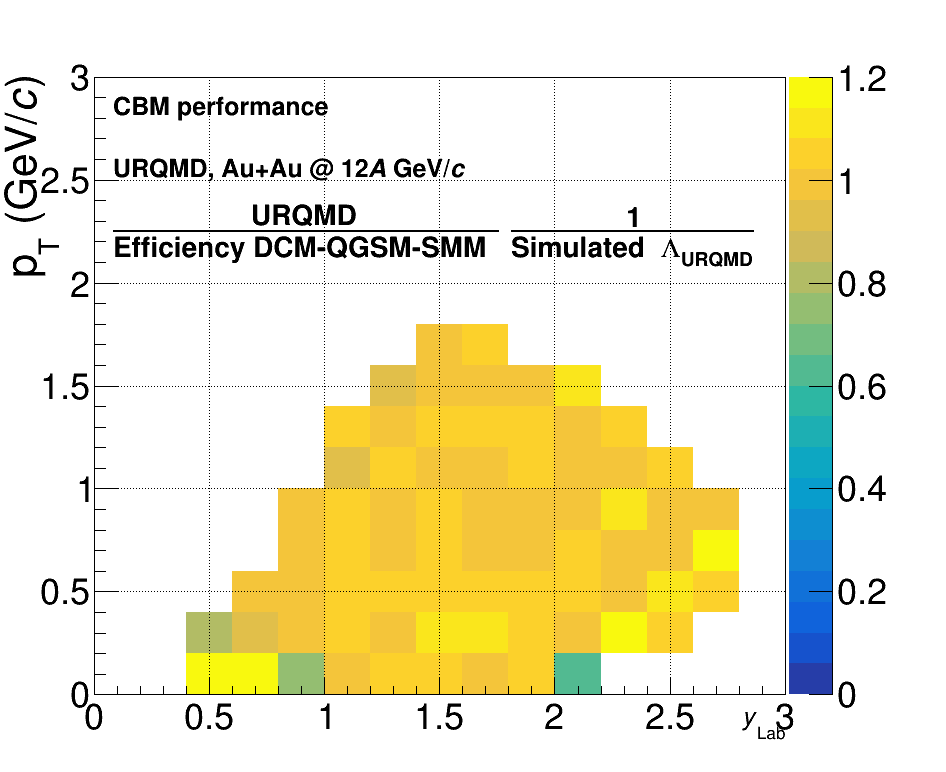

In [4]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import sys, ROOT
from ROOT import TF1, TCanvas,TMath, TColor

inFile = ROOT . TFile . Open ( "new_urqmd_efficiency_pt_y_yield_bdt_cut_0.9.root" ," READ ")
inFile1 = ROOT . TFile . Open ( "new_dcm_100_efficiency_pt_y_yield_bdt_cut_0.9.root" ," READ ")
inFile.ls()

hist_2d = inFile.Get("recons_urqmd")
hist_2d_1 = inFile1.Get("Efficiency")
hist_2d_2 = inFile.Get("Mc_urqmd")
#hist_2d_3 = inFile2.Get("reconstructable_mc")


canvas = ROOT . TCanvas (" canvas ","", 950,800)
canvas.Draw()
canvas.SetGrid()
canvas.SetRightMargin(0.17);

sum_rec=sum(hist_2d)
sum_ef=sum(hist_2d_1)

hist_2d.SetStats(0)
hist_2d.GetZaxis().SetRangeUser (0 ,1.2)
#hist_2d.GetYaxis().SetRangeUser (0 ,3)

aaa = hist_2d.Divide(hist_2d_1)
bbb = hist_2d.Divide(hist_2d_2)

hist_2d.Draw("colz")
hist_2d . SetTitle ("")
hist_2d .GetXaxis().SetTitle("#it{y}_{Lab}")
hist_2d .GetXaxis().SetTitleOffset(0.7)
hist_2d .GetXaxis().SetLabelSize(0.05)
hist_2d .GetYaxis().SetTitle("p_{T} (GeV/#it{c})")
hist_2d. GetYaxis().SetTitleSize(0.06)
hist_2d .GetYaxis().SetTitleOffset(0.7)
hist_2d .GetYaxis().SetLabelSize(0.05)
hist_2d .GetZaxis().SetLabelSize(0.05)
latex = ROOT . TLatex ()
latex . SetNDC ()
latex . SetTextSize (0.04)
latex . DrawLatex (0.12 ,0.69, "#frac{URQMD}{Efficiency DCM-QGSM-SMM} #frac{1}{Simulated #Lambda_{URQMD}} " )

latex.Draw()

latex1 = ROOT . TLatex ()
latex1 . SetNDC ()
latex1 . SetTextSize (0.035)
latex1. DrawLatex (0.12 ,0.85, "CBM performance")
latex1. DrawLatex (0.12 ,0.77, "URQMD, Au+Au @ 12#it{A} GeV/#it{c}")
#latex1 . DrawLatex (0.35 ,0.61, "= %.f / %.f = %.3f"%(sum_rec,sum_ef, sum_rec/ (sum_ef)))
latex1.Draw()
canvas . Print ("/home/shahid/cbmsoft/Cut_optimization/uncut_data/Project/pT_rapidity_distribution_XGB_extracted_signal.png")


In [ ]:
import uproot
import pandas as pd
file = uproot.open('pt_y_yield_bdt_cut_0.95.root:t1').arrays(library='pd')
file

In [ ]:
import math
def truncate(number, decimals=2):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor


def background_selector(df):
    df1 = df[(df['mass']<1.108)]
    df2 = df[df['mass']>1.13]
    df3 = pd.concat([df1, df2])
    return df3['mass'] 

In [ ]:
#lorentzian + second order pol
a = []
pt_y_bin_for_yield_min=[]
pt_y_bin_for_yield_max=[]
y_bin_for_yield_max=[]
y_bin_for_yield_min=[]
true_mc_in_recons =[]


df = file
mass_range_min = [1.08]
fit_limit_low=[0,0.1* (df['mass'].describe()[2]),   0.2* (df['mass'].describe()[2]),
               1.23,
               df['mass'].describe()[1]+1.2*(df['mass'].describe()[2])+0.1* (df['mass'].describe()[2]),
                df['mass'].describe()[1]+1.2*(df['mass'].describe()[2])+0.2* (df['mass'].describe()[2])]


for mm in mass_range_min:
    for mmm in range(0,1,1):
        canvas = ROOT . TCanvas (" canvas ","", 1200,1000)
        canvas.Draw()
        canvas . Print ("/home/shahid/cbmsoft/Cut_optimization/uncut_data/Project/pT_rapidity_distribution_XGB_extracted_signal.pdf [")


        binning = [100]
        for b in binning:

            y_bin_low=-0.2
            y_bin_up =0
            for i in range(0,15,1):
                tot_sig_3_sigma = 0
                tot_bac_3_sigma = 0
                tot_sig_3_point_5_sigma = 0
                tot_bac_3_point_5_sigma = 0
                tot_sig_2_point_5_sigma = 0
                tot_bac_2_point_5_sigma = 0
                tot_sig_2_sigma = 0
                
                y_bin_low = truncate(y_bin_low+0.2)
                y_bin_up = truncate(y_bin_up+0.2)
                df_y = df[(df['rapidity']>y_bin_low) & (df['rapidity']<y_bin_up)]
                pt_bin_low =-0.2
                pt_bin_up =0
                
                for i in range(0,15,1):
                    pt_bin_low = truncate(pt_bin_low+0.2)
                    #print(pt_bin_low)
                    pt_bin_up = truncate(pt_bin_up+0.2)
                    df_pt = df_y[(df_y['pT']>pt_bin_low) & (df_y['pT']<pt_bin_up)]
                    mc_counts = df_pt[df_pt['issignal']>0].shape[0]
                    #print(y_bin_low, y_bin_up, " pT ", pt_bin_low,pt_bin_up)
                    if df_pt.shape[0]>500:
                        data0 = background_selector(df_pt)
                        h0 = ROOT.TH1F("Background","Background without peak",b,mm,fit_limit_low[5])
                        for i in range(0,data0.shape[0]):
                            h0.Fill(data0.iloc[i])
                        fb = TF1("fb","[0]+[1]*x+[2]*x*x",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3]);
                        #fb =TF1("fb","[0]+[1]*x+[2]*x*x+[3]*x*x*x",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3])
                        #fb.SetParameters(0,0,0);
                        #fb.SetParameters(0,0,0,0);
                        h0.Fit(fb,"RIEM");
                        par = fb.GetParameters()
                        #Step 1
                        data = df_pt['mass']
                        
                #the minimum x (lower edge of the first bin)=mm        
                        h1 = ROOT.TH1F("B_&_S","rapidity=[%.2f,%.2f] & p_{T}=[%.2f,%.2f] & Min Mass= %.3f & bins=%.0f"%(df_pt['rapidity'].min(),df_pt['rapidity'].max(),df_pt['pT'].min(),df_pt['pT'].max(), mm, b),b,mm,fit_limit_low[5])
                        for i in range(0,data.shape[0]):
                            h1.Fill(data.iloc[i])
                        f1 = TF1("step1","((0.5)*[0]*0.0014) /((x-1.115683)*(x-1.115683)+ .25*0.0014*0.0014) +[1]+[2]*x+[3]*x*x",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3]);
                        #f1=TF1("step1","((0.5)*[0]*0.0014) /((x-1.115683)*(x-1.115683)+ .25*0.0014*0.0014) +[1]+[2]*x+[3]*x*x+[4]*x*x*x",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3])
                        f1.SetParameters(1,par[0], par[1], par[2]);
                        #f1.SetParameters(1,par[0], par[1], par[2],par[3]);
                        h1.Fit(f1,"RNI");
                        par1 = f1.GetParameters()

                        canvas .Clear ()
                        pad1 = ROOT . TPad (" pad1 "," pad1 " ,0 ,0.3 ,1 ,1)
                        pad1 . Draw ()
                        pad1 . cd ()
                        pad1. Clear()

                #step 2
                        f2 = TF1("full","((0.5)*[0]*[1]) /((x-[2])*(x-[2])+ .25*[1]*[1]) +[3]+[4]*x+[5]*x*x",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3])
                        #f2 = TF1("full","((0.5)*[0]*[1]) /((x-[2])*(x-[2])+ .25*[1]*[1]) +[3]+[4]*x+[5]*x*x+[6]*x*x*x",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3])
                        #f2.SetParameters(par1[0],0.001,1.115,par1[1], par1[2], par1[3], par1[4]);
                        f2.SetNpx(100000);
                        f2.SetParameters(par1[0],0.001,1.115,par1[1], par1[2], par1[3]);
                        f2.SetLineColor(ROOT.kRed)
                        r= ROOT.TFitResultPtr(h1.Fit(f2,"MNIR"))
                        par2 = f2.GetParameters()

                        fs = TF1("fs","((0.5)*[0]*[1]) /((x-[2])*(x-[2])+ .25*[1]*[1])",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3]);
                        #fs = TF1("fs","[0]*exp(-0.5*((x-[2])/[1])^2)",fit_limit_low[mmm]+mm,fit_limit_low[mmm+3]);
                        fs.SetNpx(100000);
                        fs.SetLineColor(ROOT.kGreen)
                        fb.SetLineStyle(4)
                        fb.SetLineColor(ROOT.kBlue)
                        fb.SetNpx(100000);
                        fs.SetParameters(par2[0],par2[1],par2[2]);
                        fb.SetParameters(par2[3],par2[4],par2[5], par2[6]);


                        h1.SetTitleOffset(-1)
                        h1.SetFillStyle(3003);
                        h1.SetLineWidth(2)
                        h1.SetStats (0)
                        h1.SetYTitle("Entries")
                        h1.SetLineColor(ROOT.kBlack)
                        h2 = ROOT.TH1F("h2", "", b, mm, 1.23);
                        h3 = ROOT.TH1F("h2", "", b, mm, 1.23);
                        h3.SetLineWidth(2)
                        h3.SetStats (0)
                        h3.GetXaxis().SetTitle("Mass [GeV/c{^2}]")

                        h1.Draw("pe")
                        fs.Draw("SAME")
                        fb.Draw("SAME")
                        f2.Draw("SAME")
                        bin1 = h1.FindBin(fit_limit_low[mmm]+mm);
                        bin2 = h1.FindBin(fit_limit_low[mmm+3]);
                        for i in range(bin1,bin2):
                            f_value= f2.Eval(h1.GetBinCenter(i));
                            t_value = h1.GetBinContent(i)
                            h2.SetBinContent(i,f_value)
                            if (h1.GetBinError(i) > 0):
                                h3.SetBinContent(i,(t_value-f_value)/h1.GetBinError(i))

                        h2.Sumw2()

                                #To integrate over the gaussian peak we take the integral limits 3 sigmas (i.e. parameter 3) below the mean value
                    #(i.e. par 1) of the gaussian as a minimum limit and 3 sigmas above the mean as a max limit of the integral*/
                        integral_min = par2[2] - (TMath.Abs(3*par2[1]));
                        integral_max = par2[2] + (TMath.Abs(3*par2[1]));
                    #To integrate area under the signal plus background curve we take 3 sigma and integrate
                        binwidth = h1.GetXaxis().GetBinWidth(1);
                        tot = f2.Integral(integral_min,integral_max)/binwidth;
                        sigma_integral = f2.IntegralError(integral_min,integral_max);
                    #To find the signal, we integrate just the gaussian peak with 3 sigma 
                        #params.integral = fit->GetParameter(0) * sqrt(2*3.1415) * fit->GetParameter(2) / h->GetBinWidth(1);
                        #signal_under_peak = par2[1] * np.sqrt(2*3.1415) *3 *par2[2]/ binwidth
                        signal_under_peak = fs.Integral(integral_min,integral_max)/binwidth
                        if signal_under_peak<0:
                            signal_under_peak = 0
                            print('Negative signal')                
                        sigma_signal_under_peak = fs.IntegralError(integral_min,integral_max);
                        man_sigma_signal_under_peak = TMath.Sqrt(signal_under_peak)
                        if sigma_signal_under_peak!=0:
                            print("Integral errors ",sigma_signal_under_peak)

                        tot_sig_3_sigma= tot_sig_3_sigma+signal_under_peak
                    #Background
                        backgnd_under_peak = (fb.Integral(integral_min,integral_max)/binwidth)
                        if backgnd_under_peak<0:
                            print('Negative background')
                        sigma_backgnd_under_peak = fb.IntegralError(integral_min,integral_max);
                        tot_bac_3_sigma = tot_bac_3_sigma+backgnd_under_peak
                    #Significance = signal/(signal+background)^0.5
                        Significance = signal_under_peak/TMath.Sqrt(tot);

                        #3.5 sigma
                        signal_under_peak_3_point_5_sigma = (fs.Integral(par2[2] - (TMath.Abs(3.5*par2[1])),par2[2] + (TMath.Abs(3.5*par2[1])))/binwidth);
                        bac_under_peak_3_point_5_sigma = (fb.Integral(par2[2] - (TMath.Abs(3.5*par2[1])),par2[2] + (TMath.Abs(3.5*par2[1])))/binwidth);
                        tot_sig_3_point_5_sigma = tot_sig_3_point_5_sigma+signal_under_peak_3_point_5_sigma
                        tot_bac_3_point_5_sigma = tot_bac_3_point_5_sigma + bac_under_peak_3_point_5_sigma

                        sigma_signal_under_peak_3_point_5_sigma = fs.IntegralError(par2[2] - (TMath.Abs(3.5*par2[1])),par2[2] + (TMath.Abs(3.5*par2[1])));
                        man_sigma_signal_under_peak_3_point_5_sigma = TMath.Sqrt(signal_under_peak_3_point_5_sigma)

                        signal_under_peak_2_point_5_sigma = (fs.Integral(par2[2] - (TMath.Abs(2.5*par2[1])),par2[2] + (TMath.Abs(2.5*par2[1])))/binwidth);
                        bac_under_peak_2_point_5_sigma = (fb.Integral(par2[2] - (TMath.Abs(2.5*par2[1])),par2[2] + (TMath.Abs(2.5*par2[1])))/binwidth);
                        tot_sig_2_point_5_sigma = tot_sig_2_point_5_sigma+signal_under_peak_2_point_5_sigma
                        tot_bac_2_point_5_sigma = tot_bac_2_point_5_sigma + bac_under_peak_2_point_5_sigma

                        sigma_signal_under_peak_2_point_5_sigma = fs.IntegralError(par2[2] - (TMath.Abs(2.5*par2[1])),par2[2] + (TMath.Abs(2.5*par2[1])));
                        man_sigma_signal_under_peak_2_point_5_sigma = TMath.Sqrt(signal_under_peak_2_point_5_sigma)

                        signal_under_peak_2_sigma = (fs.Integral(par2[2] - (TMath.Abs(2*par2[1])),par2[2] + (TMath.Abs(2*par2[1])))/binwidth);
                        
                        latex = ROOT . TLatex ()
                        latex . SetNDC ()
                        latex . SetTextSize (0.02)
                        latex . DrawLatex (0.4 ,0.85, "Significance in m_{0} #pm 2.5#Gamma  = #frac{%.1f #pm %.1f}{#sqrt{%.1f+%.1f}} = %.1f"%(signal_under_peak_2_point_5_sigma, man_sigma_signal_under_peak_2_point_5_sigma, signal_under_peak_2_point_5_sigma,bac_under_peak_2_point_5_sigma,signal_under_peak_2_point_5_sigma/TMath.Sqrt(bac_under_peak_2_point_5_sigma+signal_under_peak_2_point_5_sigma) ))
                        latex . DrawLatex (0.4 ,0.80, "Significance in m_{0} #pm 3#Gamma = #frac{%.1f #pm %.1f}{#sqrt{%.1f+%.1f}} = %.1f"%(signal_under_peak,man_sigma_signal_under_peak, signal_under_peak,backgnd_under_peak,Significance ))
                        latex . DrawLatex (0.4 ,0.75, "Significance in m_{0} #pm 3.5#Gamma = #frac{%.1f #pm %.1f}{#sqrt{%.1f+%.1f}} = %.1f"%(signal_under_peak_3_point_5_sigma,man_sigma_signal_under_peak_3_point_5_sigma,signal_under_peak_3_point_5_sigma,bac_under_peak_3_point_5_sigma,signal_under_peak_3_point_5_sigma/TMath.Sqrt(signal_under_peak_3_point_5_sigma+bac_under_peak_3_point_5_sigma) ))
                        latex . DrawLatex (0.4 ,0.70, " #Gamma = %.4f #pm %.5f GeV"%(par2 [1],f2.GetParError(1) ))
                        latex . DrawLatex (0.4 ,0.65, " m_{0} = %.4f #pm %.5f GeV"%(par2 [2],f2.GetParError(2) ))
                        latex . DrawLatex (0.4 ,0.6," #frac{#chi^{2}}{ndf} = %.1f/%d = %.4f"%(f2.GetChisquare() , f2.GetNDF() , f2.GetChisquare() / f2.GetNDF() ))
                        latex . DrawLatex (0.4 ,0.55," True signal (MC=1) = %.f"%(mc_counts))

                        
                        legend = ROOT.TLegend(0.87,0.3,0.6,0.6);
                        legend.AddEntry(h1,"Invariant mass of lambda","l");
                        legend.AddEntry(f2,"A #frac{0.5 #Gamma}{(m-m_{0})^{2} + 0.25#Gamma^{2}}+B+Cx+Dx^{2}","l");
                        legend.AddEntry(fs,"A #frac{0.5 #Gamma}{(m-m_{0})^{2} + 0.25#Gamma^{2}}","l");
                        legend.AddEntry(fb,"B+Cx+Dx^{2}","l");
                        legend . SetLineWidth (0)
                        legend.Draw()

                        canvas . cd ()
                        pad2 = ROOT . TPad (" pad2 "," pad2 " ,0 ,0.05 ,1 ,0.3)
                        pad2 . Draw ()
                        pad2 . cd ()
                        pad2.Clear()
                        pad2.SetGrid()


                        h3.SetLineColor(TColor.GetColor(5))
                        h3.SetYTitle("d-f/#Deltad")
                        h3.Draw()
                        line = ROOT . TLine (mm,0 ,1.23 ,0)
                        line . SetLineColor ( ROOT . kRed )
                        line . SetLineWidth (2)
                        line . Draw (" same ")


                        pad1 . SetBottomMargin (0)
                        pad2 . SetTopMargin (0)
                        pad2 . SetBottomMargin (0.25)

                        h1 . GetXaxis (). SetLabelSize (0)
                        h1 . GetXaxis (). SetTitleSize (0)
                        h1 . GetYaxis (). SetTitleSize (0.05)
                        h1 . GetYaxis (). SetLabelSize (0.03)
                        h1 . GetYaxis (). SetTitleOffset (0.6)

                        h3 . SetTitle ("")
                        h3 . GetXaxis (). SetLabelSize (0.12)
                        h3 . GetXaxis (). SetTitleSize (0.12)
                        h3 . GetYaxis (). SetLabelSize (0.1)
                        h3 . GetYaxis (). SetTitleSize (0.15)
                    #ratio . GetYaxis (). SetTitle (" Data /MC")
                        h3 . GetYaxis (). SetTitleOffset (0.17)
                    #207,512 divisions
                        h3 . GetYaxis (). SetNdivisions (207)
                        #h1 . GetYaxis (). SetRangeUser (0.5 ,)
                        h1 .GetYaxis().SetNdivisions(107)
                        h3 . GetXaxis (). SetNdivisions (207)

                        canvas . Print ("/home/shahid/cbmsoft/Cut_optimization/uncut_data/Project/pT_rapidity_distribution_XGB_extracted_signal.pdf [")

            #a.append(tot_sig_2_point_5_sigma)
                        a.append(signal_under_peak_2_point_5_sigma)
                        y_bin_for_yield_min.append(truncate(y_bin_low))
                        y_bin_for_yield_max.append(truncate(y_bin_up))
                        pt_y_bin_for_yield_min.append(pt_bin_low)
                        pt_y_bin_for_yield_max.append(pt_bin_up)
                        true_mc_in_recons.append(mc_counts)
                    else:
                        a.append(0)
                        y_bin_for_yield_min.append(truncate(y_bin_low))
                        y_bin_for_yield_max.append(truncate(y_bin_up))
                        pt_y_bin_for_yield_min.append(pt_bin_low)
                        pt_y_bin_for_yield_max.append(pt_bin_up)
                        true_mc_in_recons.append(mc_counts)
            #a.append(tot_sig_3_point_5_sigma)
#canvas . Print ("/home/shahid/cbmsoft/Cut_optimization/uncut_data/Project/pT_rapidity_distribution_XGB_extracted_signal.pdf ]")       

In [ ]:
import uproot
file =uproot.open("lambda_qa_dcm.root")
array1 = file["SimParticles_McLambda/SimParticles_rapidity_SimParticles_pT_McLambda"].to_numpy()
#for i in range(0,14,1):
array1[0][0]

In [ ]:
size = 15*15
pt_y_yields = pd.DataFrame(data=np.arange(0,size,1),columns = ['numbering'])
pt_y_yields['rapidity_min_MC'] = np.zeros(size)
pt_y_yields['pT_min_MC'] = np.zeros(size)

pt_y_yields['ratio_recons_sim']=np.zeros(size)
pt_y_yields['ratio_recons_mc']=np.zeros(size)
pt_y_yields['pT_min'] = np.zeros(size)
pt_y_yields ['pt_y_yields_MC']=np.zeros(size)
pt_y_yields['pt_y_yields_recons']=a
pt_y_yields['true_mc_in_recons'] = true_mc_in_recons
#pt_y_yields['total_mc_in_recons'] = dcm_clean_mc

for i in range(0,15):
    for j in range(0,15):
        pt_y_yields['rapidity_min_MC'].iloc[i+j*15]=0+j*0.2
    

for i in range(0,15):    
    pt_y_yields['pT_min_MC'].iloc[i]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+1*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+2*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+3*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+4*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+5*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+6*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+7*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+8*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+9*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+10*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+11*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+12*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+13*15]=i/5
    pt_y_yields['pT_min_MC'].iloc[i+14*15]=i/5
    


for i in range(0,15,1):
    pt_y_yields ['pt_y_yields_MC'].iloc[i]=array1[0][0][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+1*15]=array1[0][1][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+2*15]=array1[0][2][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+3*15]=array1[0][3][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+4*15]=array1[0][4][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+5*15]=array1[0][5][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+6*15]=array1[0][6][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+7*15]=array1[0][7][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+8*15]=array1[0][8][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+9*15]=array1[0][9][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+10*15]=array1[0][10][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+11*15]=array1[0][11][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+12*15]=array1[0][12][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+13*15]=array1[0][13][i]
    pt_y_yields['pt_y_yields_MC'].iloc[i+14*15]=array1[0][14][i]

for i in range(0,15*15,1):
    pt_y_yields['ratio_recons_mc'].iloc[i]=a[i]/pt_y_yields['true_mc_in_recons'].iloc[i]
    pt_y_yields['ratio_recons_sim'].iloc[i]=a[i]/pt_y_yields['pt_y_yields_MC'].iloc[i]
    pt_y_yields['pT_min'].iloc[i] = pt_y_bin_for_yield_min[i]
    #print("%.2f"%pt_y_yields['rapidity_min_MC'].iloc[i],"       ",pt_y_yields['pT_min_MC'].iloc[i],"    ", pt_y_yields['ratio'].iloc[i] )
#plt.plot(pt_y_yields['numbering'], pt_y_yields['ratio_recons_sim'], label='Reconstructed/Sim')
plt.plot(pt_y_yields['numbering'], pt_y_yields['ratio_recons_mc'], label='Rencostructed/MC')
plt.legend()
plt.ylim([0.9,1.1])
plt.savefig("hists")
#pt_y_yields[(pt_y_yields['rapidity_min_MC']>1) & (pt_y_yields['rapidity_min_MC']<1.4) &(pt_y_yields['pT_min_MC']<1)&(pt_y_yields['pT_min_MC']>0)]
pt_y_yields[(pt_y_yields['numbering']>100) & (pt_y_yields['numbering']<120)]